In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [148]:
airb = pd.read_csv('AB_NYC_2019.csv')
airb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [84]:
airb.shape

(48895, 16)

In [85]:
airb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [8]:
airb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [94]:
airb['reviews_per_month'].describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

In [95]:
airb['number_of_reviews'].describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [55]:
airb.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [24]:
airb['minimum_nights'].describe()
airb.loc[airb['minimum_nights'] >= 100]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,2018-11-03,0.12,1,180
245,61509,"Quiet, clean midtown apt w. elevato",23619,Anna/Fonzy,Manhattan,Midtown,40.75749,-73.96897,Entire home/apt,110,200,92,2019-04-30,0.90,1,140
667,253332,"Spacious, modern loft in awesome neighborhood",552343,Cynthia,Brooklyn,Sunset Park,40.66230,-73.99049,Entire home/apt,96,120,13,2018-09-01,0.14,1,204
700,258690,CHELSEA 1 Bdrm Plus Sleeping Loft!!,1359611,Andrea,Manhattan,Chelsea,40.74618,-74.00392,Entire home/apt,195,365,10,2014-10-26,0.12,1,0
719,263502,Prime Williamsburg 1/BD New Condo,1382749,Shaun,Brooklyn,Williamsburg,40.72059,-73.95670,Entire home/apt,185,180,24,2015-08-19,0.26,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47620,35834935,Williamsburg Apartment,82674375,Meg,Brooklyn,Williamsburg,40.70898,-73.94885,Entire home/apt,140,500,0,NaN,NaN,1,331
47745,35892874,3 Bedroom Loft Like Triplex 2.5 Bath with Garden.,269970642,Rita,Manhattan,Harlem,40.80778,-73.94762,Entire home/apt,200,120,0,NaN,NaN,1,365
48043,36056808,Luxury TriBeCa Apartment at an amazing price,271248669,Jenny,Manhattan,Tribeca,40.71206,-74.00999,Entire home/apt,6500,180,0,NaN,NaN,1,365
48205,36138789,Room with Amazing location in Manhattan,31846499,Veronika,Manhattan,East Harlem,40.78774,-73.94627,Private room,73,180,0,NaN,NaN,1,0


In [14]:
# split into hot encoding
airb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [15]:
# split into hot encoding
airb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [16]:
# possible drop
airb['last_review'].unique()

array(['2018-10-19', '2019-05-21', nan, ..., '2017-12-23', '2018-01-29',
       '2018-03-29'], dtype=object)

In [88]:
unique_neighbourhoods = airb['neighbourhood'].unique()
airb['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [18]:
# split by season?
airb['availability_365'].unique()

array([365, 355, 194,   0, 129, 220, 188,   6,  39, 314, 333,  46, 321,
        12,  21, 249, 347, 364, 304, 233,  85,  75, 311,  67, 255, 284,
       359, 269, 340,  22,  96, 345, 273, 309,  95, 215, 265, 192, 251,
       302, 140, 234, 257,  30, 301, 294, 320, 154, 263, 180, 231, 297,
       292, 191,  72, 362, 336, 116,  88, 224, 322, 324, 132, 295, 238,
       209, 328,  38,   7, 272,  26, 288, 317, 207, 185, 158,   9, 198,
       219, 342, 312, 243, 152, 137, 222, 346, 208, 279, 250, 164, 298,
       260, 107, 199, 299,  20, 318, 216, 245, 189, 307, 310, 213, 278,
        16, 178, 275, 163,  34, 280,   1, 170, 214, 248, 262, 339,  10,
       290, 230,  53, 126,   3,  37, 353, 177, 246, 225,  18, 343, 326,
       162, 240, 363, 247, 323, 125,  91, 286,  60,  58, 351, 201, 232,
       258, 341, 244, 329, 253, 348,   2,  56,  68, 360,  76,  15, 226,
       349,  11, 316, 281, 287,  14,  86, 261, 331,  51, 254, 103,  42,
       325,  35, 203,   5, 276, 102,  71,  78,   8, 182,  79,  4

In [19]:
# one-hot encoding, name/no name
airb['host_name'].unique()

array(['John', 'Jennifer', 'Elisabeth', ..., 'Abayomi', 'Alberth',
       'Ilgar & Aysel'], dtype=object)

In [21]:
# impute nan values for reviews_per_month with 0
airb[['number_of_reviews','last_review','reviews_per_month']]

,number_of_reviews,last_review,reviews_per_month
0,9,2018-10-19,0.21
1,45,2019-05-21,0.38
2,0,NaN,NaN
3,270,2019-07-05,4.64
4,9,2018-11-19,0.10
...,...,...,...
48890,0,NaN,NaN
48891,0,NaN,NaN
48892,0,NaN,NaN
48893,0,NaN,NaN


In [89]:
# replace each with year instead of date
# makes it easier for sorting
airb['last_review'].sort_values(ascending=True)

317      2011-03-28
163      2011-04-25
330      2011-05-12
125      2011-09-18
143      2011-09-19
            ...    
48890           NaN
48891           NaN
48892           NaN
48893           NaN
48894           NaN
Name: last_review, Length: 48895, dtype: object

# Feature Engineering

In [92]:
# airb['neighbourhood_group'] = airb['neighbourhood_group'].replace(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],[1,2,3,4,5])
airb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Exploratory Analysis

In [236]:
airb.price.unique()
airb.reviews_per_month.describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

In [257]:
## almost half the data has less than one review per month
airb.loc[airb.reviews_per_month <= 1]

# 16754 have <= 0.5 reviews per month
airb.loc[airb.reviews_per_month <= 0.5]

# 15019 have <= 0.4 reviews per month
airb.loc[airb.reviews_per_month <= 0.4]

# 12949 have <= 0.3 reviews per month
airb.loc[airb.reviews_per_month <= 0.3]

# 10118 have <= 0.2 reviews per month
airb.loc[airb.reviews_per_month <= 0.2]

# 6004 have <= 0.1 reviews per month
airb.loc[airb.reviews_per_month <= 0.1]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
143,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,2011-09-19,0.01,1,1
229,59121,"Nice, clean, safe, convenient 3BR",204539,Mark,Queens,Ridgewood,40.70411,-73.89934,Entire home/apt,140,14,1,2012-09-17,0.01,5,365
317,74860,"Sunlit and Cozy Williamsburg/Greenpoint, Brooklyn",394752,Allison,Brooklyn,Greenpoint,40.72488,-73.95018,Private room,55,2,1,2011-03-28,0.01,1,0
355,98330,LOVELY APARTMENT IN THE HEART OF NY,31374,Shon,Manhattan,Kips Bay,40.73877,-73.97707,Entire home/apt,125,4,1,2012-01-03,0.01,3,181
608,229874,Oversized Studio in Park Slope,507304,Derrick,Brooklyn,Sunset Park,40.66293,-73.99833,Entire home/apt,200,5,1,2012-01-02,0.01,1,0
613,231414,TURQUOISE: One-Bedroom Apt. in Soho,1184442,Roberto,Manhattan,SoHo,40.72599,-74.00168,Private room,270,5,1,2013-07-09,0.01,1,210
741,268481,Resort-like living in Williamsburg,1380703,Vishal,Brooklyn,Williamsburg,40.71647,-73.93974,Entire home/apt,290,30,1,2013-09-24,0.01,1,0
783,281521,Amazing West Village 2br,70614,Vimal,Manhattan,West Village,40.73879,-74.00425,Entire home/apt,200,27,1,2012-10-02,0.01,1,0
798,285442,Huge room with private balcony,1475866,Jesper,Manhattan,East Village,40.73119,-73.98819,Private room,300,6,1,2013-05-06,0.01,1,0
871,311003,"2 BD / 2BA WITH GARDEN, SLEEPS 6",72747,Karen,Brooklyn,Crown Heights,40.67679,-73.95639,Entire home/apt,225,4,1,2013-04-21,0.01,1,342


In [144]:
airb.availability_365.describe()

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

In [194]:
#1295 available all year round
airb.loc[airb['availability_365'] == 365]

#17533 with 0 availability
airb.loc[airb['availability_365'] == 0]

# 2021 with up to a week availability
airb.loc[(airb['availability_365'] > 0) & (airb['availability_365'] <= 7)]

# 1430 with > 7 and <= 15 day availability
airb.loc[(airb['availability_365'] > 7) & (airb['availability_365'] <= 15)]

# 1823 with > 15 and <= 30 day availability
airb.loc[(airb['availability_365'] > 15) & (airb['availability_365'] <= 30)]
# -----------------------------------------------------------------------------------------------------
# 6439 with > 30 and <= 90 day availability
#airb.loc[(airb['availability_365'] > 30) & (airb['availability_365'] <= 90)]

# # 22807 with less than or equal to 30 day availability
# airb.loc[airb['availability_365'] <= 30 ]

# 1696 with > 30 days and <= 45 days
#airb.loc[(airb['availability_365'] > 30) & (airb['availability_365'] <= 45)]

# 1300 with > 45 days and <= 60 days
#airb.loc[(airb['availability_365'] > 45) & (airb['availability_365'] <= 60)]

# 1333 with > 60 days and <= 75 days
#airb.loc[(airb['availability_365'] > 60) & (airb['availability_365'] <= 75)]

# 2110 with > 75 days and <= 90 days
#airb.loc[(airb['availability_365'] > 75) & (airb['availability_365'] <= 90)]

# 1823 with > 15 and <= 30 day availability
#airb.loc[(airb['availability_365'] > 15) & (airb['availability_365'] <= 30)]

# -----------------------------------------------------------------------------------------------------

# 1347 with > 90 and <= 120 day availability
airb.loc[(airb['availability_365'] > 90) & (airb['availability_365'] <= 120)]

# 1489 with > 120 and <= 150 day availability
airb.loc[(airb['availability_365'] > 120) & (airb['availability_365'] <= 150)]

# 2449 with > 150 and <= 180 day availability
airb.loc[(airb['availability_365'] > 150) & (airb['availability_365'] <= 180)]

# 1349 with > 180 and <= 210 day availability
airb.loc[(airb['availability_365'] > 180) & (airb['availability_365'] <= 210)]

# 1354 with > 210 and <= 240 day availability
airb.loc[(airb['availability_365'] > 210) & (airb['availability_365'] <= 240)]

# 1765 with > 240 and <= 270 day availability
airb.loc[(airb['availability_365'] > 240) & (airb['availability_365'] <= 270)]

# 1743 with > 270 and <= 300 day availability
airb.loc[(airb['availability_365'] > 270) & (airb['availability_365'] <= 300)]

# 2549 with > 300 and <= 330 day availability
airb.loc[(airb['availability_365'] > 300) & (airb['availability_365'] <= 330)]

# 5649 with > 330 and <= 365 day availability
airb.loc[(airb['availability_365'] > 330) & (airb['availability_365'] <= 365)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
143,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,2011-09-19,0.01,1,1
152,36133,Classic Artist Loft Williamsburg,142684,White,Brooklyn,Williamsburg,40.71536,-73.96057,Private room,125,3,155,2019-06-13,1.61,1,1
162,39704,"Private, Large & Sunny 1BR w/W&D",170510,Renée,Brooklyn,Bedford-Stuyvesant,40.68306,-73.94659,Entire home/apt,135,2,309,2019-06-22,2.86,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48852,36455809,"Cozy Private Room in Bushwick, Brooklyn",74162901,Christine,Brooklyn,Bushwick,40.69805,-73.92801,Private room,30,1,1,2019-07-08,1.00,1,1
48861,36468409,One bedroom Manhattan Upper East Side Apartment,57502664,Omar,Manhattan,Upper East Side,40.76628,-73.95795,Entire home/apt,120,1,0,NaN,NaN,1,1
48864,36471896,Private Bedroom & PRIVATE BATHROOM in Manhattan,23548340,Sarah,Manhattan,Upper East Side,40.77192,-73.95369,Private room,95,1,0,NaN,NaN,1,2
48869,36474023,"Cozy, Sunny Brooklyn Escape",1550580,Julia,Brooklyn,Bedford-Stuyvesant,40.68759,-73.95705,Private room,45,4,0,NaN,NaN,1,7


In [69]:
min_nights = {"1 Night":0, "2 Nights":0, "3 Nights":0,"4-7 Nights":0, "8-14 Nights":0,"15-30 Nights":0, "Over 30 Nights":0}

for value in airb['minimum_nights']:
    if value == 1:
        min_nights["1 Night"] += 1
    elif value == 2:
        min_nights["2 Nights"] += 1
    elif value == 3:
        min_nights["3 Nights"] += 1
    elif value >=4 and value <= 7:
        min_nights["4-7 Nights"] += 1
    elif value >= 8 and value <=14:
        min_nights["8-14 Nights"] += 1
    elif value >= 15 and value <=30:
        min_nights["15-30 Nights"] += 1
    else:
        min_nights["Over 30 Nights"] += 1
        
print(min_nights)
    
# 11696 stayed 2 nights
#airb.loc[airb['minimum_nights'] == 2]

# almost 70% of people stayed between 1 and 3 nights... wow
#airb.loc[airb['minimum_nights'] <= 3]

# 3303 stayed 4 nights
#airb.loc[airb['minimum_nights'] == 4]

# 3034 stayed 5 nights
#airb.loc[airb['minimum_nights']==5]

# 2058 stayed a week
#airb.loc[airb['minimum_nights'] == 7]

# 3078 stayed a month
#airb.loc[airb['minimum_nights'] == 30]

{'1 Night': 12720, '2 Nights': 11696, '3 Nights': 7999, '4-7 Nights': 9147, '8-14 Nights': 1433, '15-30 Nights': 5153, 'Over 30 Nights': 747}


In [203]:
availability_365 = {"0 Days":0, "<= 7 Days":0, "8-14 Days":0,"15-30 Days":0, 
              "31-60 Days":0,"61-90 Days":0, "91-120 Days":0, "121-150 Days":0,
             "151-180 Days":0, "181-210 Days":0, "211-240 Days":0, "241-270 Days":0,
             "271-300 Days":0, "301-330 Days":0, "331-365 Days":0}

for value in airb['availability_365']:
    if value == 0:
        availability_365["0 Days"] += 1
    elif value > 0 and value <= 7:
        availability_365["<= 7 Days"] += 1
    elif value > 7 and value <= 14:
        availability_365["8-14 Days"] += 1
    elif value > 14 and value <= 30:
        availability_365["15-30 Days"] += 1
    elif value > 30 and value <=60:
        availability_365["31-60 Days"] += 1
    elif value > 60 and value <=90:
        availability_365["61-90 Days"] += 1
    elif value > 91 and value <=120:
        availability_365["91-120 Days"] += 1
    elif value > 121 and value <=150:
        availability_365["121-150 Days"] += 1
    elif value > 151 and value <=180:
        availability_365["151-180 Days"] += 1
    elif value > 181 and value <=210:
        availability_365["181-210 Days"] += 1
    elif value > 211 and value <=240:
        availability_365["211-240 Days"] += 1
    elif value > 241 and value <=270:
        availability_365["241-270 Days"] += 1
    elif value > 271 and value <=300:
        availability_365["271-300 Days"] += 1
    elif value > 301 and value <=330:
        availability_365["301-330 Days"] += 1    
    else:
        availability_365["331-365 Days"] += 1
        
print(availability_365)

{'0 Days': 17533, '<= 7 Days': 2021, '8-14 Days': 1271, '15-30 Days': 1982, '31-60 Days': 2996, '61-90 Days': 3443, '91-120 Days': 1297, '121-150 Days': 1445, '151-180 Days': 2390, '181-210 Days': 1371, '211-240 Days': 1304, '241-270 Days': 1726, '271-300 Days': 1690, '301-330 Days': 2396, '331-365 Days': 6030}


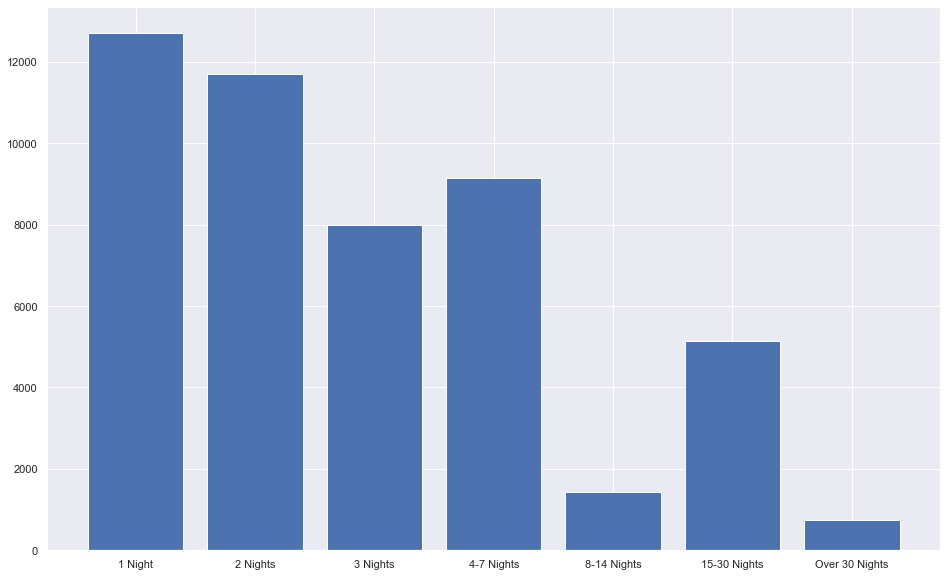

In [204]:
plt.figure(figsize=(16,10))

plt.bar(range(len(min_nights)), list(min_nights.values()))
plt.xticks(range(len(min_nights)), list(min_nights.keys()))

plt.show()

#plt.ylabel('Number of Places')
#plt.xlabel('Minimum # of Nights')
#plt.title('Minimum Nights Distribution')

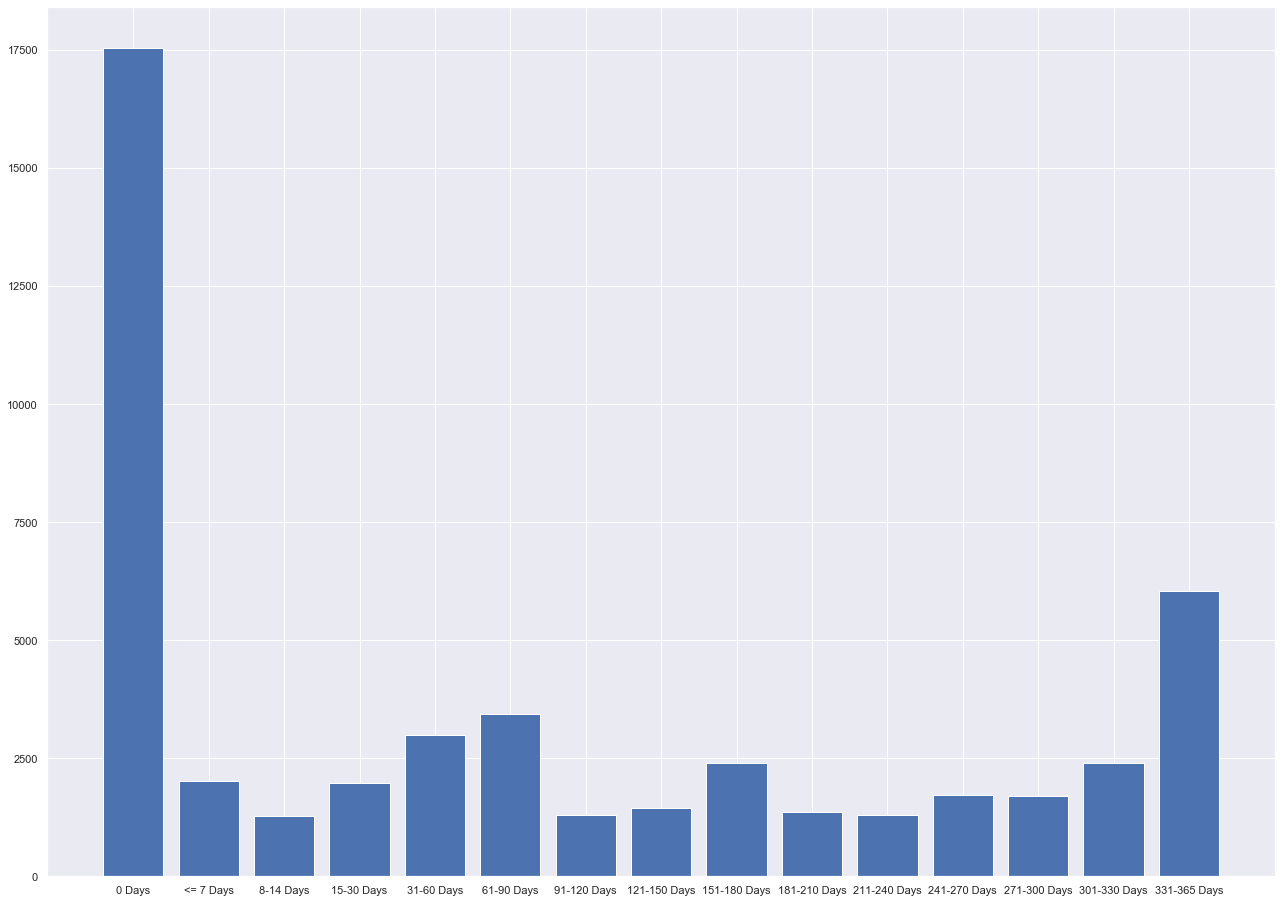

In [214]:
plt.figure(figsize=(22,16))

plt.bar(range(len(availability_365)), list(availability_365.values()))
plt.xticks(range(len(availability_365)), list(availability_365.keys()))

plt.show()

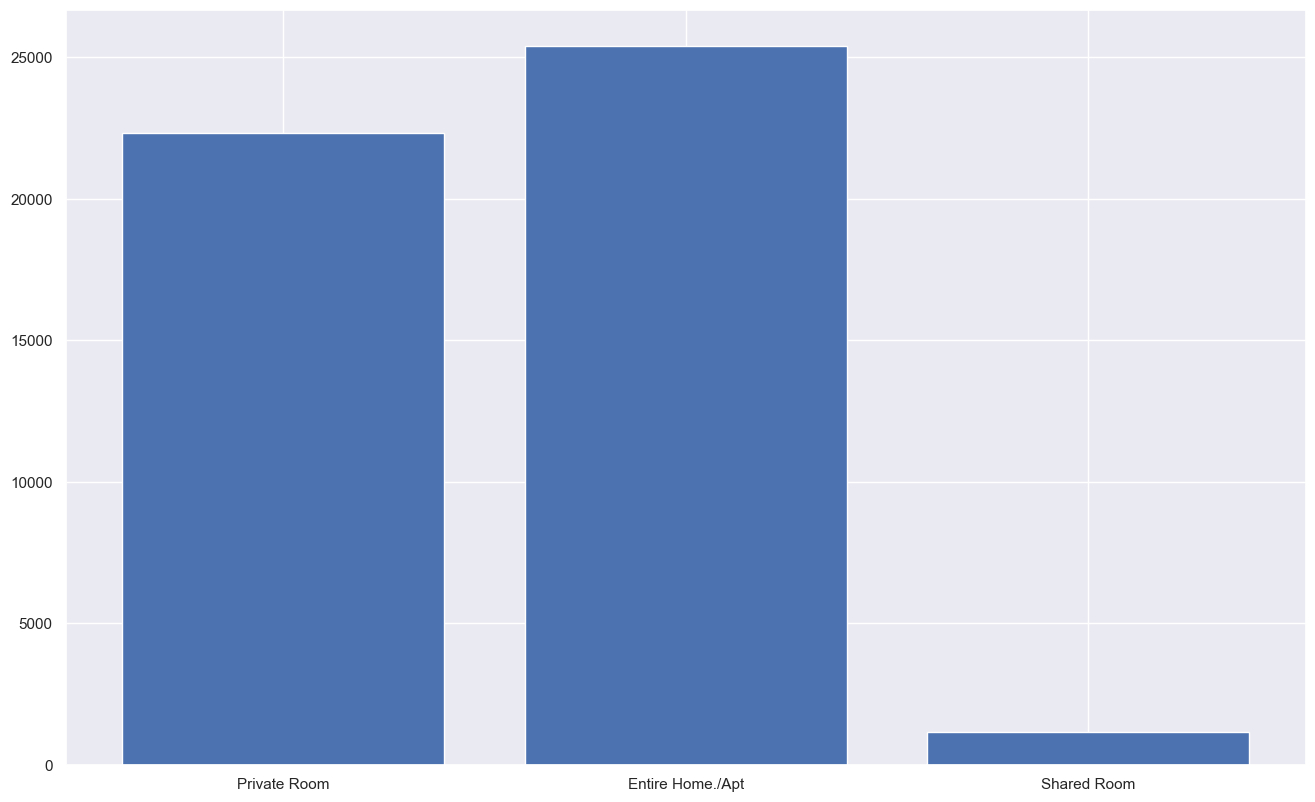

In [92]:
pvt_room, ent_home_apt, shared_room = 'Private room', 'Entire home/apt', 'Shared room'

pvt_room = airb.loc[airb['room_type'] == 'Private room'].count()[0]
ent_home_apt = airb.loc[airb['room_type'] == 'Entire home/apt'].count()[0]
shared_room = airb.loc[airb['room_type'] == 'Shared room'].count()[0]
housing = [pvt_room, ent_home_apt, shared_room]
labels=['Private Room', 'Entire Home./Apt', 'Shared Room']

plt.figure(figsize=(16,10), dpi=100)

plt.bar(labels, housing)
plt.show()

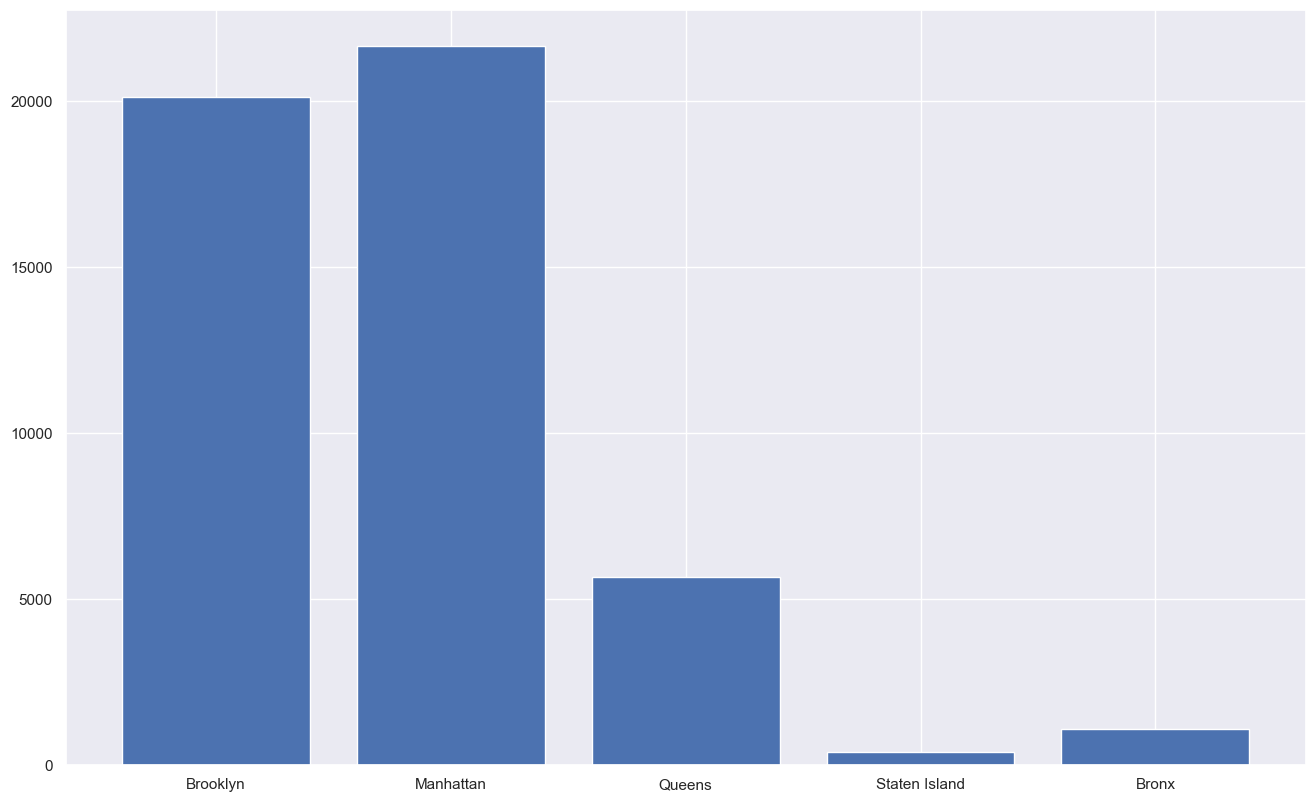

In [93]:
brooklyn = airb.loc[airb['neighbourhood_group'] == 'Brooklyn'].count()[0]
manhattan = airb.loc[airb['neighbourhood_group'] == 'Manhattan'].count()[0]
queens = airb.loc[airb['neighbourhood_group'] == 'Queens'].count()[0]
staten_island = airb.loc[airb['neighbourhood_group'] == 'Staten Island'].count()[0]
bronx = airb.loc[airb['neighbourhood_group'] == 'Bronx'].count()[0]

neighbourhood_group = [brooklyn, manhattan, queens, staten_island, bronx]
labels=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

plt.figure(figsize=(16,10), dpi=100)

plt.bar(labels, neighbourhood_group)
plt.show()

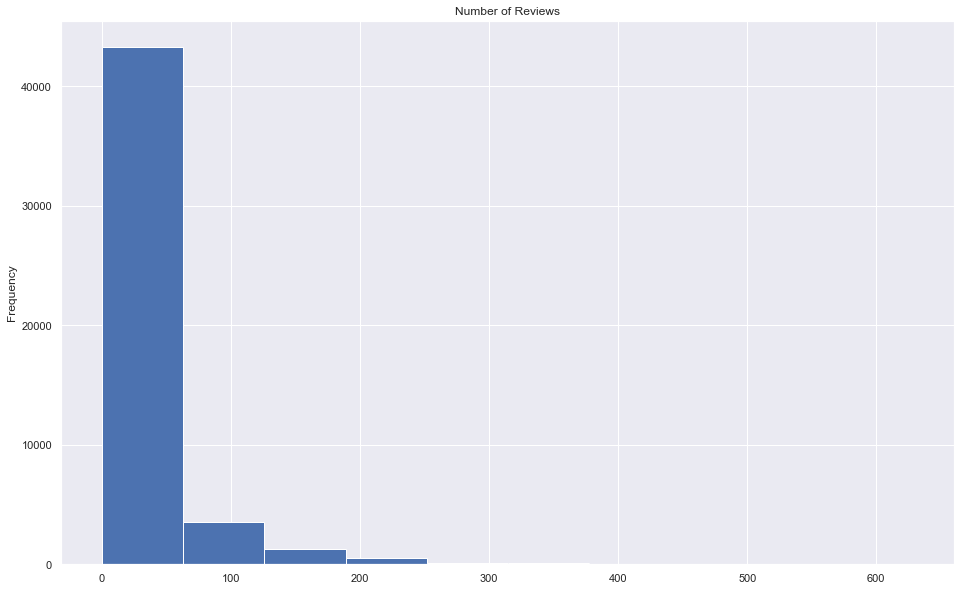

In [232]:
# search for distplot in matplotlib?
airb['number_of_reviews'].plot(kind='hist', figsize=(16,10), title='Number of Reviews')

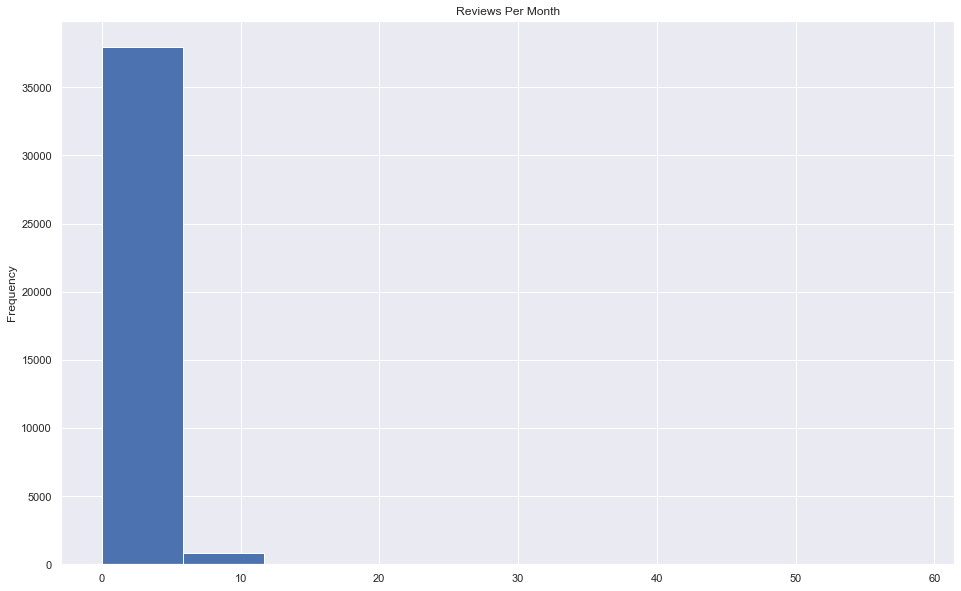

In [258]:
airb['reviews_per_month'].plot(kind='hist', figsize=(16,10), title='Reviews Per Month')

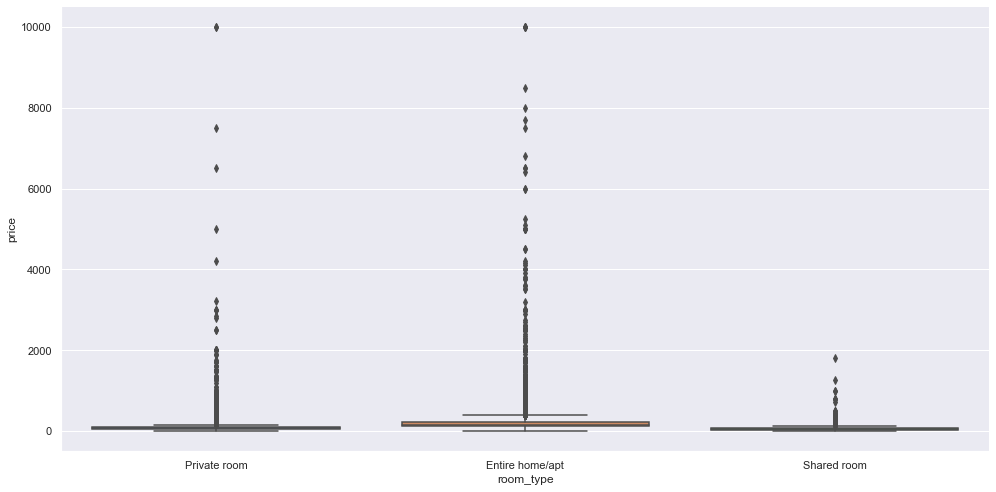

In [141]:
sns.catplot(
    data=airb,
    x='room_type',
    y='price',
    kind='box',
    height=7,
    aspect=2)

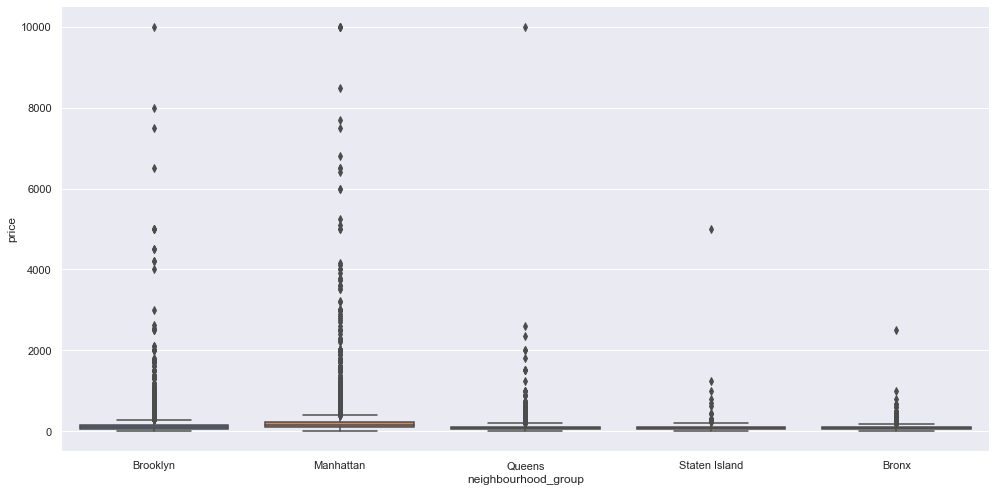

In [135]:
sns.catplot(
    data=airb,
    x='neighbourhood_group',
    y='price',
    kind='box',
    height=7,
    aspect=2)

In [119]:
##sns.pairplot(airb[['price','minimum_nights','availability_365','number_of_reviews']])